In [1]:
%matplotlib inline

In [14]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [15]:
data = ps.read_csv("../data/multiphase/results.csv")
f_escape = ps.read_csv("../data/multiphase/fesc_clumpy.csv")

In [16]:
data.describe()

,ID,H_em,P_cl,T_ICM,T_cl,Z_cl,beta_cl,chisq,cloud_Rin,cloud_Rout,...,grid_rnd_seed,id,n_HI_ICM,n_HI_cl,r_cl,r_gal,sigma_cl,sigma_i,vinf_cl,zeta_Z
count,2488.000000,2488.000000,2488.000000,2.488000e+03,2488.000000,2488.000000,2488.000000,2488.000000,2488.0,2488.0,...,2488.0,2488.000000,2.488000e+03,2488.000000,2488.000000,2488.0,2488.000000,2488.000000,2488.000000,2488.000000
mean,1243.500000,1751.326718,0.503793,1.003851e+07,19765.405626,0.273294,1.812311,35947.663087,0.0,5000.0,...,123456.0,1243.500000,7.824821e-08,0.624261,115.141952,5000.0,52.347079,52.405229,403.213443,0.014685
std,718.368058,719.642994,0.290414,1.238160e+07,12517.563531,0.254519,0.408114,34963.936803,0.0,0.0,...,0.0,718.368058,1.866427e-07,0.731703,49.115420,0.0,27.264105,27.270420,230.905401,0.022529
min,0.000000,501.423700,0.000239,3.000902e+05,5008.272000,0.030007,1.100000,1223.491797,0.0,5000.0,...,123456.0,0.000000,1.005050e-12,0.030072,30.036630,5000.0,0.000000,5.029782,0.000000,0.000100
25%,621.750000,1136.036250,0.257945,1.113740e+06,9150.848250,0.070621,1.460000,15125.707495,0.0,5000.0,...,123456.0,621.750000,3.505727e-11,0.090140,72.363635,5000.0,28.564707,28.462385,205.757975,0.000627
50%,1243.500000,1733.591500,0.498750,4.183082e+06,16161.255000,0.165121,1.820000,27170.775955,0.0,5000.0,...,123456.0,1243.500000,1.174529e-09,0.291594,114.176400,5000.0,52.302395,51.810935,398.557600,0.003414
75%,1865.250000,2365.887500,0.754240,1.489513e+07,28610.990000,0.412259,2.170000,48308.328566,0.0,5000.0,...,123456.0,1865.250000,3.257601e-08,0.912260,158.348575,5000.0,75.712417,75.430875,608.059750,0.017760
max,2487.000000,2998.644000,0.999992,4.977452e+07,49941.730000,0.998844,2.500000,577597.786685,0.0,5000.0,...,123456.0,2487.000000,9.980237e-07,2.996807,199.968800,5000.0,99.997650,99.964350,799.663300,0.099932


In [17]:
f_escape.describe()

,fesc_ion,fesc_lya
count,2.488000e+03,2488.000000
mean,3.685580e-02,0.601677
std,6.217918e-02,0.301803
min,1.789721e-51,0.003388
25%,4.061992e-03,0.349413
50%,1.199195e-02,0.662721
75%,3.762593e-02,0.881001
max,4.642314e-01,0.998857


In [18]:
chisq = data.chisq
min_chisq = chisq.min()
chisq_limit = min_chisq * 3.0
sorted_id = np.argsort(chisq)
ii = chisq < chisq_limit
best_models = data.loc[ii]
f_esc_best_models = f_escape.loc[ii]
print len(chisq[ii])

40


In [19]:
best_models.describe()

,ID,H_em,P_cl,T_ICM,T_cl,Z_cl,beta_cl,chisq,cloud_Rin,cloud_Rout,...,grid_rnd_seed,id,n_HI_ICM,n_HI_cl,r_cl,r_gal,sigma_cl,sigma_i,vinf_cl,zeta_Z
count,40.000000,40.000000,40.000000,4.000000e+01,40.000000,40.000000,40.000000,40.000000,40.0,40.0,...,40.0,40.000000,4.000000e+01,40.000000,40.000000,40.0,40.000000,40.000000,40.000000,40.000000
mean,1228.825000,1753.857917,0.653488,7.336791e+06,18978.097550,0.326806,1.781000,2981.374043,0.0,5000.0,...,123456.0,1228.825000,2.646198e-08,0.850330,110.144591,5000.0,67.221071,55.778306,98.486064,0.014293
std,714.645147,705.207753,0.305550,8.403288e+06,12877.073706,0.255537,0.464271,637.604231,0.0,0.0,...,0.0,714.645147,4.815801e-08,0.914984,44.169477,0.0,18.464845,29.856298,83.452453,0.018033
min,9.000000,504.174300,0.066267,3.429846e+05,5172.863000,0.034761,1.100000,1223.491797,0.0,5000.0,...,123456.0,9.000000,1.633967e-12,0.032025,35.356710,5000.0,11.605270,9.961078,1.372696,0.000118
25%,684.500000,1235.227500,0.414481,1.153602e+06,8293.151000,0.099690,1.255000,2618.630555,0.0,5000.0,...,123456.0,684.500000,8.292898e-11,0.162302,78.398315,5000.0,58.467962,31.455100,48.433375,0.000702
50%,1188.000000,1638.739000,0.788092,4.187036e+06,16324.965000,0.247094,1.800000,3168.140434,0.0,5000.0,...,123456.0,1188.000000,1.963932e-09,0.371365,106.580350,5000.0,69.498875,54.011300,79.375780,0.005033
75%,1840.000000,2377.585500,0.908377,1.035340e+07,28172.477500,0.500579,2.215000,3496.921915,0.0,5000.0,...,123456.0,1840.000000,2.694899e-08,1.414856,137.993500,5000.0,81.319170,80.094490,119.330925,0.026640
max,2423.000000,2977.269000,0.996017,3.379341e+07,49324.640000,0.909925,2.470000,3661.095910,0.0,5000.0,...,123456.0,2423.000000,2.014545e-07,2.960838,198.651900,5000.0,96.859500,99.852490,391.530100,0.062258


In [20]:
f_esc_best_models.describe()

,fesc_ion,fesc_lya
count,40.000000,40.000000
mean,0.017181,0.569020
std,0.042046,0.303829
min,0.000092,0.038445
25%,0.003486,0.300075
50%,0.007742,0.694058
75%,0.013976,0.804663
max,0.267885,0.983714


In [27]:
def plot_distros(fullsample, subsample, chi2sub, labelx):
    fig = plt.figure(1, figsize=(11,5))
    plt.clf()
    #plt.rc('text', usetex=True,)
    plt.rc('font', family='serif', size=20)
    #plt.set_ticklabels(ax, size=35)
    n_full = len(fullsample)
    n_sub = len(subsample)
    #print type(fullsample)
    #print fullsample
    int_full = np.linspace(0.0,1.0,n_full)
    int_sub = np.linspace(0.0, 1.0, n_sub)
   
    plt.subplot(121)
    plt.plot(np.sort(fullsample), int_full ,label=r'${\rm Full\ Sample}$')
    plt.plot(np.sort(subsample), int_sub, label=r'${\rm Best\ Sample}$')
    plt.legend(loc=2, prop={'size':20})
    
    ks_stat, p_value = stats.ks_2samp(fullsample, subsample)
    
    ax = plt.gca()
    plt.xlabel(labelx, fontsize=20)
    plt.ylabel(r'${\rm Integrated\ Distribution}$', fontsize=20)
    
    plt.subplot(122)
    plt.scatter(subsample, chi2sub)
    
    ax = plt.gca()
    plt.xlabel(labelx, fontsize=20)
    plt.ylabel(r'$\chi^2$', fontsize=20)
    
    plt.savefig(labelx+'.png')
    plt.show(fig)
    plt.close(fig)
    return ks_stat, p_value

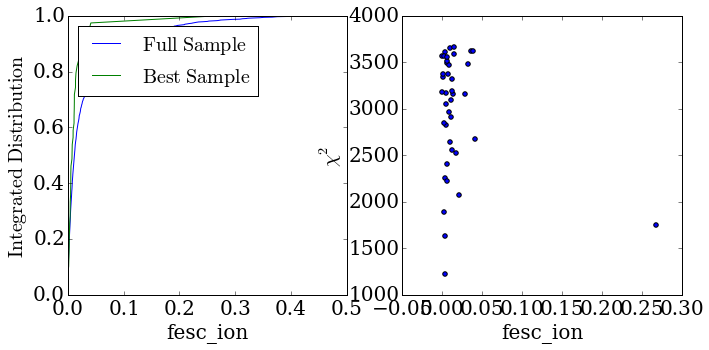

[ 0.25704203  0.77421825  1.94989731]
Pvalue 0.0156212271802


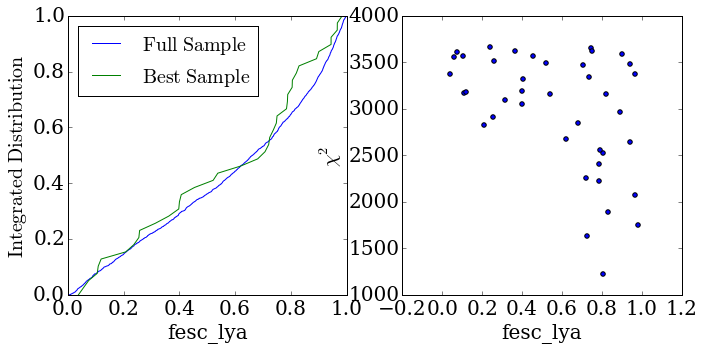

Pvalue 0.350239208979


In [29]:
ks_stat, p_value = plot_distros(f_escape['fesc_ion'].values, f_esc_best_models['fesc_ion'].values,
                     best_models['chisq'].values, 'fesc_ion')
best_q =  f_esc_best_models['fesc_ion'].quantile([0.16,0.50,0.84])
print best_q.values * 100
print "Pvalue {}".format(p_value)
ks_stat, p_value = plot_distros(f_escape[' fesc_lya'].values, f_esc_best_models[' fesc_lya'].values,
                     best_models['chisq'].values, 'fesc_lya')
print "Pvalue {}".format(p_value)

----
P_cl
0.934819795292
[ 0.30351504  0.78809165  0.9428689 ]


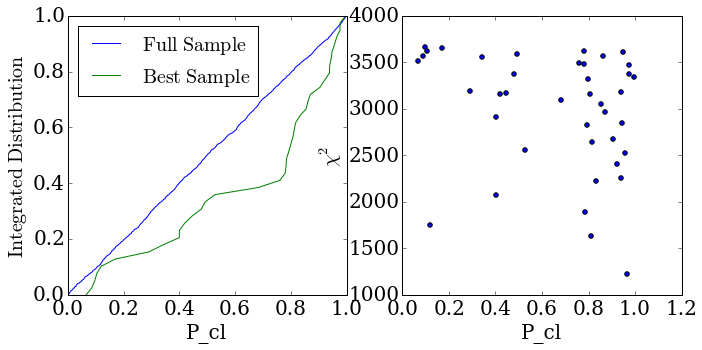

Pvalue 5.28929579545e-05
----
sigma_i
1.16400651514
[ 19.8291656  54.0113     94.263142 ]


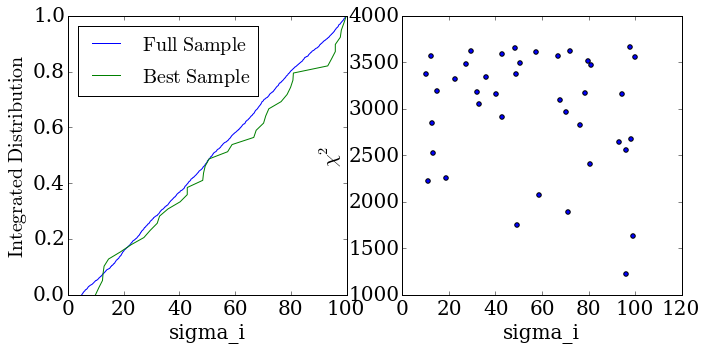

Pvalue 0.598725008834
----
sigma_cl
0.507468879033
[ 52.1273808  69.498875   84.6365852]


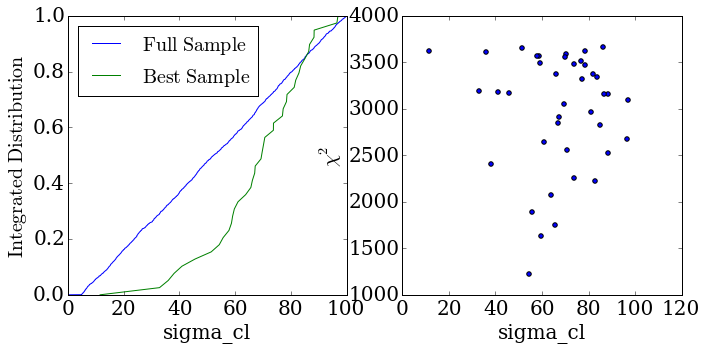

Pvalue 0.000136483833
----
vinf_cl
0.210889980397
[  37.8762792   79.37578    152.349844 ]


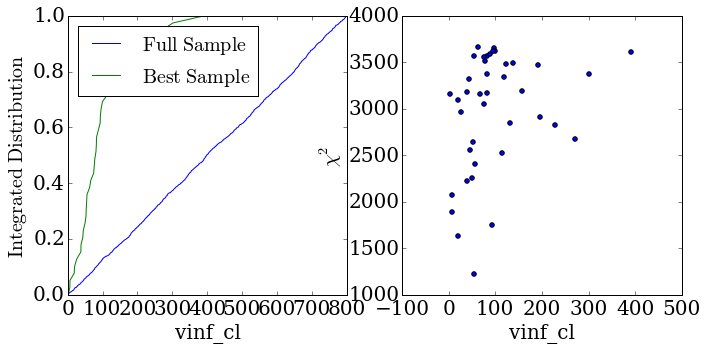

Pvalue 4.65489375089e-16


In [31]:
column_log= ['T_ICM', 'n_HI_ICM', 'T_cl', 'n_HI_cl', 'zeta_Z']
column_lin = ['H_em', 'P_cl', 'f_cl', 'sigma_i', 'beta_cl', 'sigma_cl', 'vinf_cl', 'r_cl']
columns = []
change = [] 
values = []
p_values = []
try_columns = ['P_cl', 'sigma_i', 'sigma_cl', 'vinf_cl']
for column in try_columns:
    if column in column_log:
        print "----"
        print column
        best_q = np.log10(best_models[column].quantile([0.16,0.50,0.84]))
        all_q = np.log10(data[column].quantile([0.16,0.50,0.84]))
        delta_all = all_q.values[2] - all_q.values[0]
        delta_best = best_q.values[2] - best_q.values[0]
        print delta_best/delta_all
        print best_q.values
        change.append(delta_best/delta_all)
        columns.append(column)
        values.append(best_q.values)
        _, pv = plot_distros(np.log10(data[column].values), np.log10(best_models[column].values), 
                     best_models['chisq'].values, column)
        p_values.append(pv)
        print "Pvalue {}".format(pv)
    if column in column_lin:
        print "----"
        print column
        best_q = (best_models[column].quantile([0.16,0.50,0.84]))
        all_q = (data[column].quantile([0.16,0.50,0.84]))
        delta_all = all_q.values[2] - all_q.values[0]
        delta_best = best_q.values[2] - best_q.values[0]
        print delta_best/delta_all
        print best_q.values
        change.append(delta_best/delta_all)
        columns.append(column)
        values.append(best_q.values)
        _,pv = plot_distros((data[column].values), (best_models[column].values),
                     best_models['chisq'].values, column)
        p_values.append(pv)
        print "Pvalue {}".format(pv)
        #print column


In [38]:
ii = np.argsort(p_values)
for i in ii:
    print columns[i], values[i], p_values[i]

vinf_cl [  37.8762792   79.37578    152.349844 ] 4.65489375089e-16
P_cl [ 0.30351504  0.78809165  0.9428689 ] 5.28929579545e-05
sigma_cl [ 52.1273808  69.498875   84.6365852] 0.000136483833
sigma_i [ 19.8291656  54.0113     94.263142 ] 0.598725008834


In [39]:
from astropy.constants import G, M_sun, kpc, k_B, m_p
from astropy import units as u
sigma_clouds= np.array(values[ii[2]])

r = 5.0 * kpc.to('cm')
print r
sigma = sigma_clouds * u.kilometer / u.second
print sigma
dynamical_mass = r * sigma **2 / (2.0*G.cgs)
dynamical_mass.to('M_sun')

1.54283879073e+22 cm
[ 52.1273808  69.498875   84.6365852] km / s


<Quantity [  1.57902845e+09,  2.80681439e+09,  4.16269327e+09] solMass>

In [42]:
from astropy.constants import G, M_sun, kpc, k_B, m_p
from astropy.cosmology import default_cosmology
from barak import virial
n_points = 100
z = 0.0
mass = np.logspace(9,12,n_points)
mu = 0.59
km = 1e5
cosmo = default_cosmology.get()
rho_virial = virial.deltavir(z, cosmo=cosmo) * cosmo.critical_density(z) 
M_g = mass * M_sun.cgs
rvir = ((3 * M_g) / (4 * np.pi * rho_virial))**(1./3)
#print rvir.to('kpc')
vcirc = np.sqrt(G.cgs * M_g / rvir)
#print vcirc.to('km/s')
Tvir = mu * m_p.cgs * vcirc * vcirc / (2 * k_B.cgs)
#print Tvir.to('Kelvin')